In [17]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)
np.random.seed(3)

In [18]:
def generate_oe_matrix(length:int, variance_threshold_L:int = 0.85, variance_threshold_U:int = 1):
    """
        Generates a random 5x5 symmetric matrix with positive values and
        the first PC explaining at least L% and at most U% of the variance.
    """

    while True:
        # Create a nxn array with random positive values
        matrix = np.abs(np.random.randn(length, length) * 10)  # Use absolute values for positive entries
        # Make the array symmetric
        matrix = matrix + matrix.T
        origin_matrix = matrix.copy()

        # Subtract the mean of each row to center the data (For PCA)
        matrix = matrix - matrix.mean(axis=1, keepdims=True)

        # SVD 
        n = len(matrix[0])
        y = matrix.T / np.sqrt(n)
        U, S, Vh = np.linalg.svd(y, full_matrices=True)
        eigenvalues = S * S
        EV1_explained_variance = eigenvalues[0] / np.sum(eigenvalues) 

        # Check if the first PC explains at least the desired variance
        if EV1_explained_variance >= variance_threshold_L and EV1_explained_variance < variance_threshold_U:
            return origin_matrix

length = 5
# Generate a matrix that meets the conditions
oe = generate_oe_matrix(length=length)
corr_oe = np.corrcoef(oe)
# Subtract the mean of each row to center the data
corr_oe_zero = corr_oe - corr_oe.mean(axis=1, keepdims=True)

print("oe")
print(oe, '\n')
print("corr_oe")
print(corr_oe, '\n')
print("corr_oe_zero")
print(corr_oe_zero, '\n')

oe
[[20.26367 19.71099 21.56335 12.70008 25.12474]
 [19.71099 16.91667 31.94627  7.55831 28.1381 ]
 [21.56335 31.94627  3.94829 28.3884   8.29234]
 [12.70008  7.55831 28.3884   8.75893 37.08606]
 [25.12474 28.1381   8.29234 37.08606  9.67577]] 

corr_oe
[[ 1.       0.8759  -0.6746   0.7716  -0.87243]
 [ 0.8759   1.      -0.89708  0.83968 -0.9866 ]
 [-0.6746  -0.89708  1.      -0.92244  0.93153]
 [ 0.7716   0.83968 -0.92244  1.      -0.9153 ]
 [-0.87243 -0.9866   0.93153 -0.9153   1.     ]] 

corr_oe_zero
[[ 0.77991  0.6558  -0.89469  0.55151 -1.09253]
 [ 0.70952  0.83362 -1.06346  0.6733  -1.15298]
 [-0.56208 -0.78457  1.11252 -0.80992  1.04405]
 [ 0.61689  0.68497 -1.07715  0.84529 -1.07001]
 [-0.70387 -0.81804  1.10009 -0.74674  1.16856]] 



#### Perform PCA on the Pearson correlation matrix <br>

In [19]:
n = length
y = corr_oe_zero.T / np.sqrt(n)

U, S, Vh = np.linalg.svd(y, full_matrices=True)
eigenvalues = S * S
explained_variances = eigenvalues / np.sum(eigenvalues)
cov_x = np.matmul(y.T, y)
V_Cx = np.matmul(Vh, cov_x)

print('explained variances')
print(explained_variances, '\n')
print("V")
print(V_Cx, '\n')
print("P transpose")
print(Vh.T, '\n')
print("P")
print(Vh, '\n')

explained variances
[0.99416 0.00499 0.00085 0.00001 0.     ] 

V
[[-1.5971  -1.78503  1.73771 -1.72817  1.82687]
 [ 0.01396  0.00426  0.01008 -0.008   -0.00079]
 [ 0.00125 -0.00178  0.00087  0.00226  0.00066]
 [ 0.00001 -0.00001 -0.00002 -0.00001  0.00002]
 [ 0.       0.      -0.       0.      -0.     ]] 

P transpose
[[-0.41126  0.71687  0.3762   0.40859  0.09208]
 [-0.45966  0.21873 -0.53669 -0.20806 -0.63996]
 [ 0.44747  0.51765  0.26092 -0.66489 -0.14712]
 [-0.44501 -0.41068  0.68008 -0.28642 -0.29793]
 [ 0.47043 -0.04044  0.19964  0.5154  -0.6867 ]] 

P
[[-0.41126 -0.45966  0.44747 -0.44501  0.47043]
 [ 0.71687  0.21873  0.51765 -0.41068 -0.04044]
 [ 0.3762  -0.53669  0.26092  0.68008  0.19964]
 [ 0.40859 -0.20806 -0.66489 -0.28642  0.5154 ]
 [ 0.09208 -0.63996 -0.14712 -0.29793 -0.6867 ]] 



In [20]:
print('V_Cx[0]')
print(V_Cx[0], '\n')
print('Vh[0]')
print(Vh[0], '\n')
print('cov_x')
print(cov_x, '\n')

V_Cx[0]
[-1.5971  -1.78503  1.73771 -1.72817  1.82687] 

Vh[0]
[-0.41126 -0.45966  0.44747 -0.44501  0.47043] 

cov_x
[[ 0.66732  0.7365  -0.70711  0.70585 -0.75164]
 [ 0.7365   0.8224  -0.79701  0.79141 -0.84027]
 [-0.70711 -0.79701  0.78303 -0.77685  0.81723]
 [ 0.70585  0.79141 -0.77685  0.77388 -0.81222]
 [-0.75164 -0.84027  0.81723 -0.81222  0.85959]] 



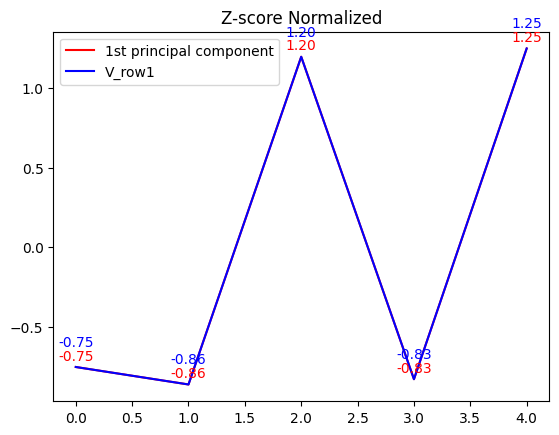

In [21]:
cov_x_sum = [np.sum(np.abs(row)) for row in cov_x]
cov_x_sum = list(enumerate(cov_x_sum)) 
sorted_list = sorted(cov_x_sum, key=lambda x: x[1], reverse=True) 
cov_x_selected = cov_x[sorted_list[0][0]]

if np.corrcoef(cov_x_selected, Vh[0])[0][1] < 0:
    cov_x_selected = -cov_x_selected

Vh0_Norm = (Vh[0] - np.mean(Vh[0])) / np.std(Vh[0])
cov_x_selected_Norm = (cov_x_selected - np.mean(cov_x_selected)) / np.std(cov_x_selected)
V_Cx0_Norm = (V_Cx[0] - np.mean(V_Cx[0])) / np.std(V_Cx[0])

plt.plot(Vh0_Norm, c="red")
plt.plot(V_Cx0_Norm, c="blue")
# plt.plot(cov_x_selected_Norm, c="black")

plt.title("Z-score Normalized")
plt.legend(["1st principal component", "V_row1"])

# zip joins x and y coordinates in pairs
# https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
Vh0_Norm_xs = np.arange(0, length, 1)
for x, y in zip(Vh0_Norm_xs, Vh0_Norm):
    label = "{:.2f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 5), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='red'
    ) 

V_Cx0_Norm_xs = np.arange(0, length, 1)
for x, y in zip(V_Cx0_Norm_xs, V_Cx0_Norm):
    label = "{:.2f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 15), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='blue'
    ) 

In [22]:
plt.close('all')

### Check the plot without Normalization on the Pearson correlation matrix

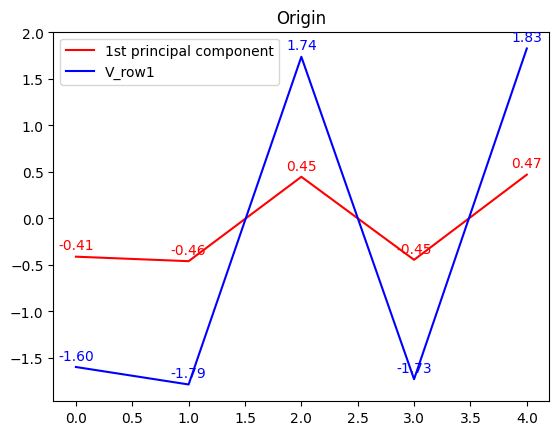

In [23]:
plt.plot(Vh[0], c="red")
plt.plot(V_Cx[0], c="blue")
# plt.plot(cov_x_selected, c="black")

plt.title("Origin")
plt.legend(["1st principal component", "V_row1"])

# zip joins x and y coordinates in pairs
# https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
Vh0_xs = np.arange(0, length, 1)
for x, y in zip(Vh0_xs, Vh[0]):
    label = "{:.2f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 5), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='red'
    ) 

V_Cx0_xs = np.arange(0, length, 1)
for x, y in zip(V_Cx0_xs, V_Cx[0]):
    label = "{:.2f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 5), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='blue'
    ) 

In [24]:
plt.close('all')